In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import itertools

from scipy.linalg import LinAlgError
from scipy import stats
from scipy.stats import gaussian_kde, norm

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
temp=pd.read_csv('/content/drive/MyDrive/Sudhanshu Pal/Climate Change Prediction /Time-Series-Analysis-of-Climate-Change-using-ARIMA-Model-main/GlobalLandTemperaturesByCountry.csv')
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
temp.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [ ]:
print(temp.columns)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')


In [ ]:
temp.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [ ]:
temp=pd.read_csv('/content/drive/MyDrive/Sudhanshu Pal/Climate Change Prediction /Time-Series-Analysis-of-Climate-Change-using-ARIMA-Model-main/GlobalLandTemperaturesByCountry.csv',parse_dates=['dt'])
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
countries=temp['Country'].unique()
print(countries)

['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Burundi' "Côte D'Ivoire" 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros'
 'Congo (Democratic Republic Of The)' 'Congo' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark (Europe)' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of

In [ ]:
country_list = ['Canada', 'Brazil', 'Congo', 'India', 'United Kingdom', 'United States', 'Swaziland', 'Italy', 'Europe', 'France', 'Japan', 'Russia']
temp['Year'] = temp['dt'].dt.year
temp['Month'] = temp['dt'].dt.month
temp=temp.set_index('dt')


In [ ]:
temp_country=temp[temp['Country'].isin(country_list)]
temp_copy = temp_country.copy()
temp_copy.fillna(method='ffill', inplace=True)
temp_copy

,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
dt,,,,,
1832-01-01,24.935,1.372,Brazil,1832,1
1832-02-01,24.505,1.953,Brazil,1832,2
1832-03-01,24.617,1.359,Brazil,1832,3
1832-04-01,23.990,2.013,Brazil,1832,4
1832-05-01,23.124,1.592,Brazil,1832,5
...,...,...,...,...,...
2013-05-01,14.073,0.178,United States,2013,5
2013-06-01,20.198,0.236,United States,2013,6
2013-07-01,22.074,0.152,United States,2013,7


In [ ]:
countries=temp['Country'].unique()
print(countries)

['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Burundi' "Côte D'Ivoire" 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros'
 'Congo (Democratic Republic Of The)' 'Congo' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark (Europe)' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of

<Axes: xlabel='dt'>

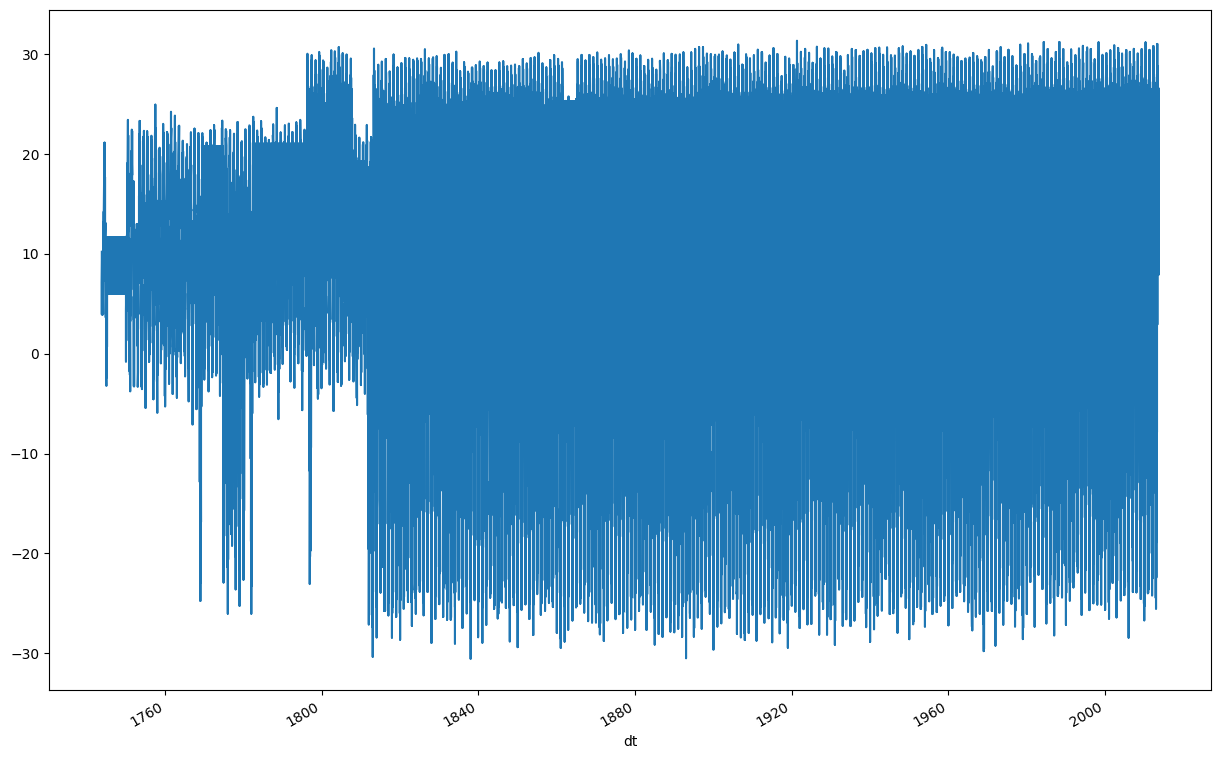

In [ ]:
temp_copy['AverageTemperature'].plot(figsize=(15,10))

In [ ]:
temp_copy.describe()

,AverageTemperature,AverageTemperatureUncertainty,Year,Month
count,31900.000000,31900.000000,31900.000000,31900.000000
mean,11.448072,1.166606,1898.140313,6.497179
std,11.905859,1.360683,70.736992,3.451312
min,-30.577000,0.053000,1743.000000,1.000000
25%,5.281000,0.256000,1845.000000,3.000000
50%,12.992500,0.583000,1902.000000,6.000000
75%,20.748250,1.645000,1958.000000,9.000000
max,31.329000,12.564000,2013.000000,12.000000


In [ ]:
df=pd.pivot_table(temp_copy,index='Year', columns='Country',values='AverageTemperature',aggfunc='mean')
df

Country,Brazil,Canada,Congo,Europe,France,India,Italy,Japan,Russia,Swaziland,United Kingdom,United States
Year,,,,,,,,,,,,
1743,NaN,NaN,NaN,3.942000,10.203000,NaN,9.538000,NaN,NaN,NaN,7.086000,NaN
1744,NaN,NaN,NaN,8.707250,13.189333,NaN,13.482833,NaN,NaN,NaN,8.955250,NaN
1745,NaN,NaN,NaN,4.100250,10.431250,NaN,9.186250,NaN,NaN,NaN,5.650167,NaN
1746,NaN,NaN,NaN,6.013000,11.672000,NaN,10.728000,NaN,NaN,NaN,6.450000,NaN
1747,NaN,NaN,NaN,6.013000,11.672000,NaN,10.728000,NaN,NaN,NaN,6.450000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,25.600583,-4.135083,25.349250,9.150333,13.941667,25.146667,14.052917,12.933833,-4.608500,19.293000,9.453333,9.137083
2010,25.812417,-1.887917,25.559417,8.279833,13.115417,25.050833,13.324917,13.215583,-4.520583,19.756333,8.394333,9.505583
2011,25.428917,-3.557083,24.775083,9.384417,14.479583,24.415583,14.173167,12.737750,-3.401583,19.359000,9.907917,9.549917


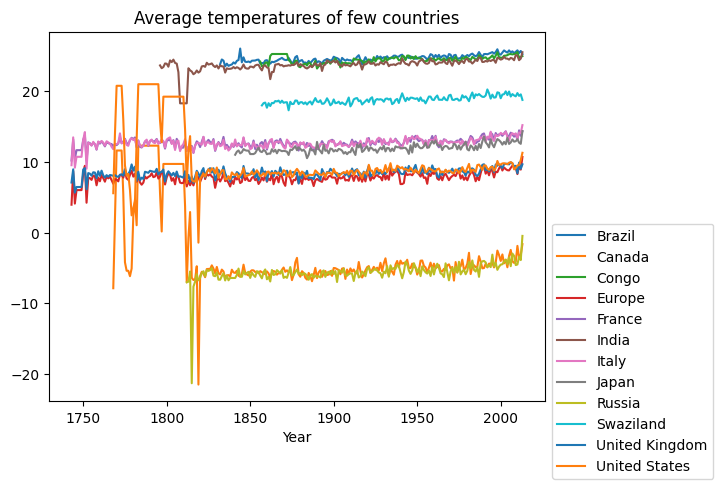

In [ ]:
df.plot()
plt.title('Average temperatures of few countries')
plt.rcParams["figure.figsize"] = (20,12)
plt.legend(bbox_to_anchor =(1, 0.5))

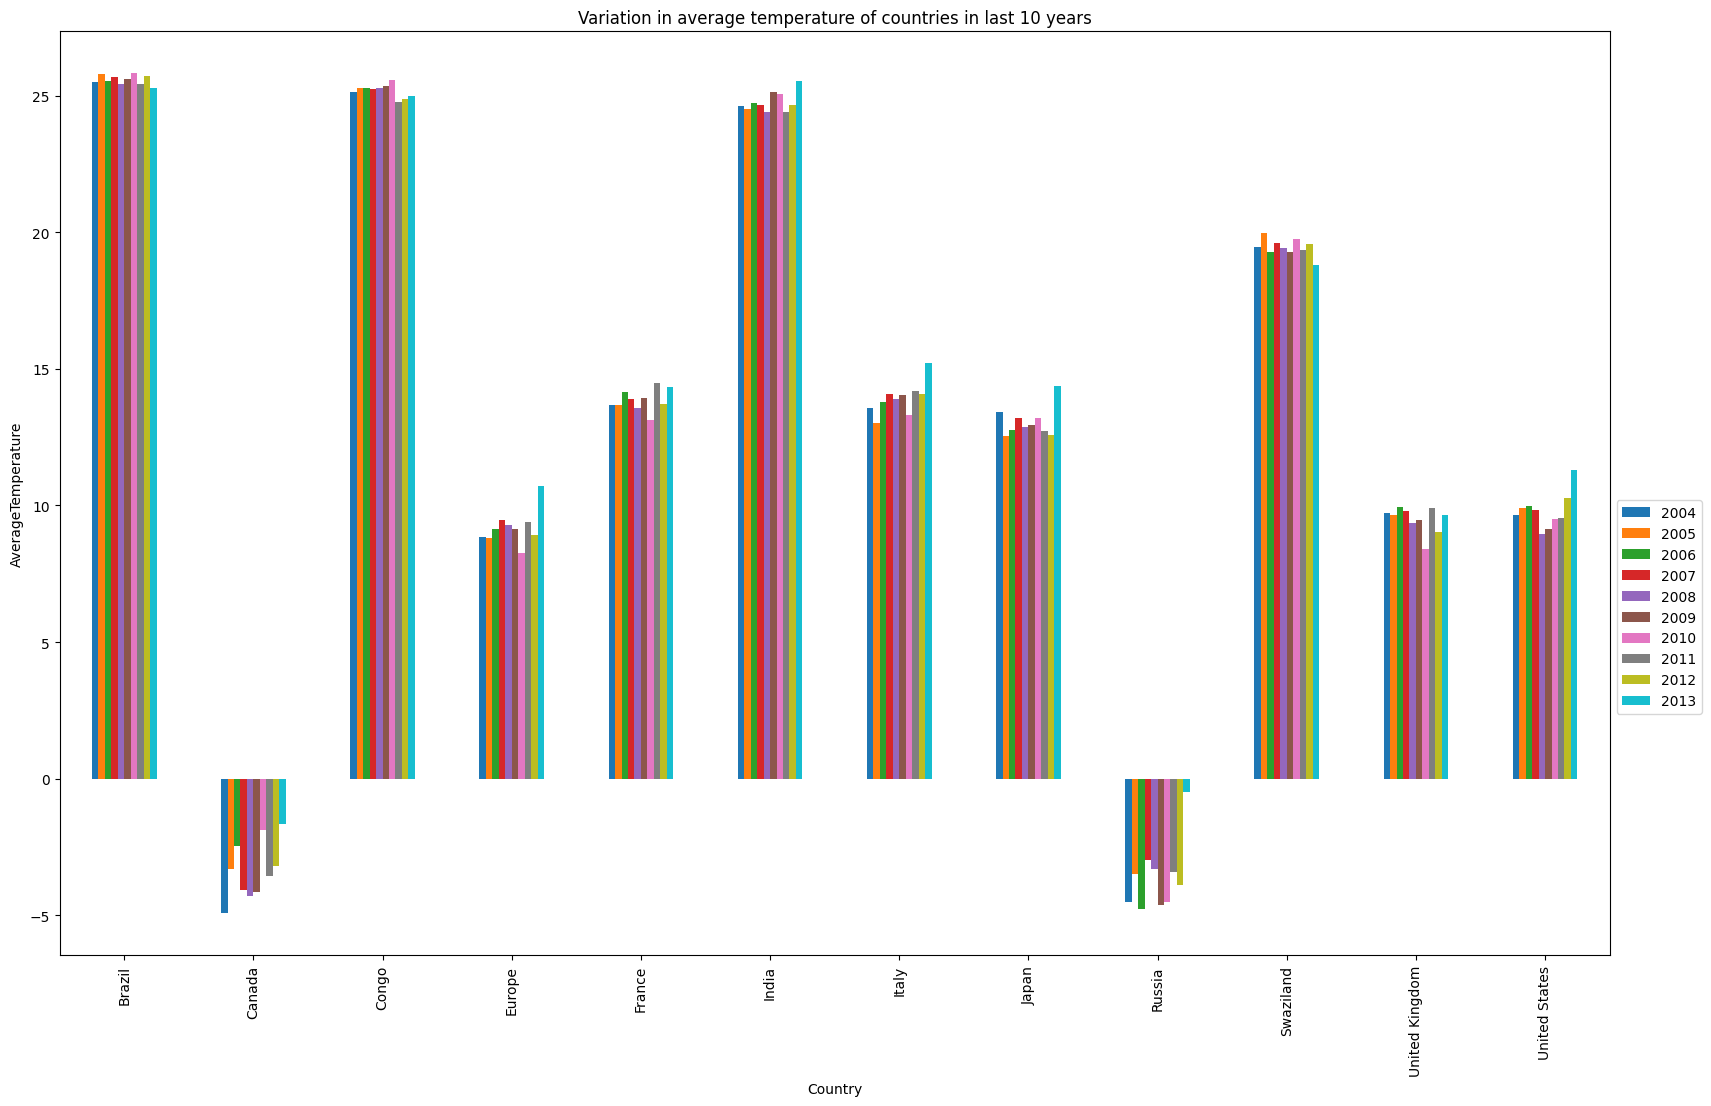

In [ ]:
ax = df[-10:].T.plot(kind='bar', ylabel='AverageTemperature')
plt.title('Variation in average temperature of countries in last 10 years')
plt.rcParams["figure.figsize"] = (12,8)
plt.legend(bbox_to_anchor=(1,0.5))

In [ ]:
countries=pd.read_csv('/content/drive/MyDrive/Sudhanshu Pal/Climate Change Prediction /Time-Series-Analysis-of-Climate-Change-using-ARIMA-Model-main/GlobalLandTemperaturesByCountry.csv',parse_dates=['dt'])
india=temp_copy.loc[temp_copy['Country']=='India',['Year','AverageTemperature']]
india.columns=['year','AvgTemp']
india=india.groupby(pd.Grouper(freq='Y')).mean()
india['year']=india.index.year
india


,year,AvgTemp
dt,,
1796-12-31,1796,23.675250
1797-12-31,1797,23.280750
1798-12-31,1798,23.449083
1799-12-31,1799,23.949417
1800-12-31,1800,23.911917
...,...,...
2009-12-31,2009,25.146667
2010-12-31,2010,25.050833
2011-12-31,2011,24.415583


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log  

t=india['AvgTemp'].values
fuller_test= adfuller(t)
fuller_out=pd.Series(fuller_test[0:4],index=['Test Stats','p-value','Lags used','No. of observations used'])
print(fuller_out)
for key,value in fuller_test[4].items():
  print('\t%s: %.3f' %(key,value))

if fuller_test[0]<fuller_test[4]['5%']:
  print('Reject H0 - Time series is stationary')
else:
  print('Failed to Reject H0 - Time series is not stationary')

Test Stats                   -2.794173
p-value                       0.059111
Lags used                     6.000000
No. of observations used    211.000000
dtype: float64
	1%: -3.462
	5%: -2.875
	10%: -2.574
Failed to Reject H0 - Time series is not stationary


In [ ]:
#Rolling Statistics test for India temerature
test=pd.DataFrame()
test['year']=india['year']
test['AvgTemp']=india['AvgTemp']
test=test.set_index('year')
print(test)
rollmean=test.rolling(window=12).mean()
rollstd=test.rolling(window=12).std()
print(rollmean,'\n', rollstd)

        AvgTemp
year           
1796  23.675250
1797  23.280750
1798  23.449083
1799  23.949417
1800  23.911917
...         ...
2009  25.146667
2010  25.050833
2011  24.415583
2012  24.640833
2013  25.540111

[218 rows x 1 columns]
        AvgTemp
year           
1796        NaN
1797        NaN
1798        NaN
1799        NaN
1800        NaN
...         ...
2009  24.676896
2010  24.701514
2011  24.681160
2012  24.693062
2013  24.772912

[218 rows x 1 columns] 
        AvgTemp
year          
1796       NaN
1797       NaN
1798       NaN
1799       NaN
1800       NaN
...        ...
2009  0.199208
2010  0.226217
2011  0.240825
2012  0.234393
2013  0.334795

[218 rows x 1 columns]


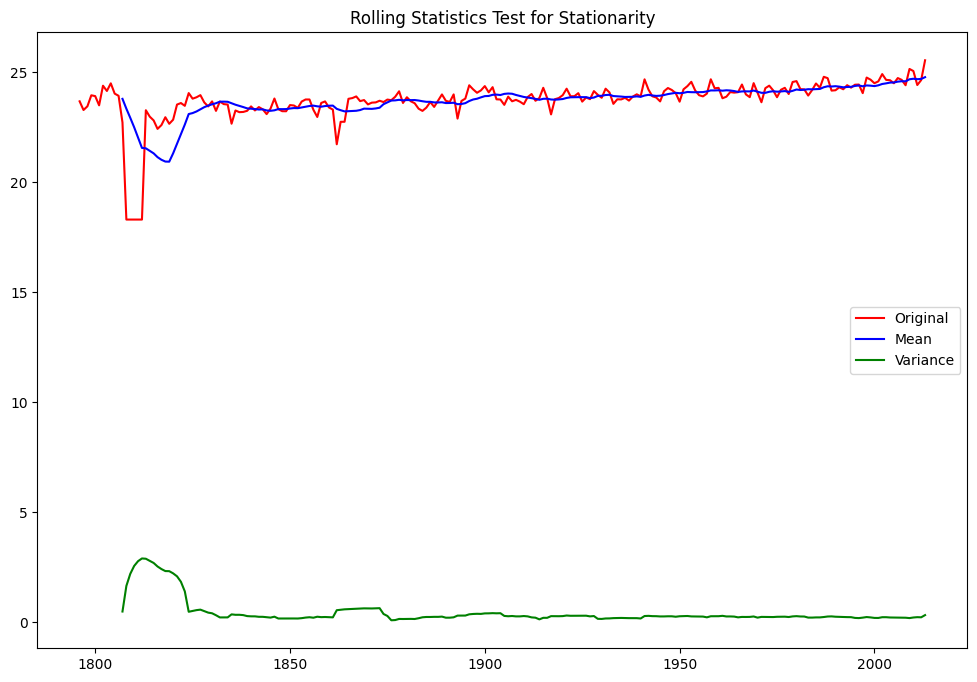

In [ ]:
original=plt.plot(test,color='red',label='Original')
mean=plt.plot(rollmean,color='blue',label='Mean')
std=plt.plot(rollstd,color='green',label='Variance')
plt.rcParams["figure.figsize"]=(10,6)
plt.legend(loc='best')
plt.title('Rolling Statistics Test for Stationarity')
plt.show()

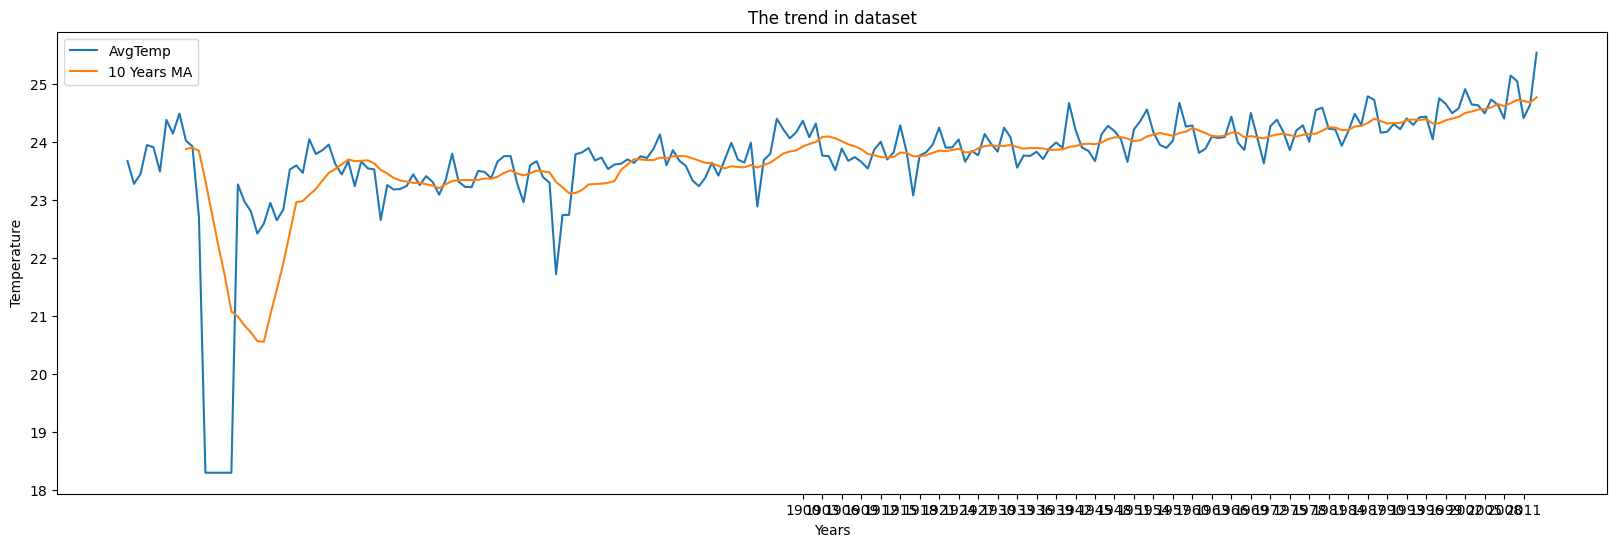

In [ ]:
year_avg = pd.pivot_table(india, values='AvgTemp', index='year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['AvgTemp'].rolling(10).mean()
year_avg[['AvgTemp','10 Years MA']].plot(figsize=(20,6))
plt.title('The trend in dataset')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()

In [ ]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(temp_copy['AverageTemperature'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=121275.839, Time=87.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=180119.347, Time=0.93 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=157181.291, Time=2.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=164745.797, Time=7.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=180117.347, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=29.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=138028.718, Time=49.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=120534.763, Time=70.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=128331.696, Time=36.67 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=120184.914, Time=95.92 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=125025.662, Time=44.01 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=120971.881, Time=113.89 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=120531.307, Time=114.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=121179.062, Time=86.60 sec


In [ ]:
from pmdarima import auto_arima
stepwise_fit_india = auto_arima(test, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=382.925, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=384.217, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=384.154, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=380.973, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.337 seconds


In [ ]:
print(temp_copy.shape)
train1=temp_copy.iloc[:-30]
test1=temp_copy.iloc[-30:]
print(train1.shape,test1.shape)

(31900, 5)
(31870, 5) (30, 5)


In [ ]:
print(test.shape)
train2=test.iloc[:-30]
test2=test.iloc[-30:]
print(train2.shape,test2.shape)

(218, 1)
(188, 1) (30, 1)


In [ ]:
test1=test1.set_index('Year')
test1

,AverageTemperature,AverageTemperatureUncertainty,Country,Month
Year,,,,
2011,8.582,0.158,United States,4
2011,13.759,0.183,United States,5
2011,19.578,0.251,United States,6
2011,22.722,0.220,United States,7
2011,21.915,0.132,United States,8
2011,17.148,0.110,United States,9
2011,10.490,0.134,United States,10
2011,2.966,0.186,United States,11
2011,-0.635,0.253,United States,12


In [ ]:
train1=train1.set_index('Year')
train1

,AverageTemperature,AverageTemperatureUncertainty,Country,Month
Year,,,,
1832,24.935,1.372,Brazil,1
1832,24.505,1.953,Brazil,2
1832,24.617,1.359,Brazil,3
1832,23.990,2.013,Brazil,4
1832,23.124,1.592,Brazil,5
...,...,...,...,...
2010,3.601,0.155,United States,11
2010,-2.942,0.208,United States,12
2011,-3.507,0.208,United States,1


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model1=ARIMA(train1['AverageTemperature'],order=(5,1,2))
model1=model1.fit()
model1.summary()

NotImplementedError: ignored

In [ ]:
train2

In [ ]:
#from pandas._libs.algos import take_2d_axis1_int32_int32
#test2=take_2d_axis1_int32_int32.set_index('Year')
test2

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model2=ARIMA(train2['AvgTemp'],order=(0,1,0))
model2=model2.fit()
model2.summary()

In [ ]:
pred2=model2.predict(typ='levels').rename('ARIMA Predictions')
pred2.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [ ]:
pred2

In [ ]:
train2

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print(train2['AvgTemp'].mean())
rmse=sqrt(mean_squared_error(pred2,train2[1:]))
print(rmse)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model2=ARIMA(test2['AvgTemp'],order=(0,1,0))
model2=model2.fit()
model2.summary()

In [ ]:
pred3=model2.predict(typ='levels').rename('ARIMA Predictions')
pred3.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [ ]:
pred3

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print(test2['AvgTemp'].mean())
rmse=sqrt(mean_squared_error(pred3,test2[1:]))
print(rmse)

In [1]:
index_future_dates=pd.date_range(start='2016-12-30',end='2017-01-27')
#print(index_future_dates)
pred=model2.predict(typ='levels').rename('Future ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

NameError: ignored